In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("healthinsurance.csv")

In [3]:
data.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [5]:
print(data['no_of_dependents'].unique())
print(data['smoker'].unique())
print(data['diabetes'].unique())
print(data['regular_ex'].unique())

[1 2 0 3 4 5]
[0 1]
[0 1]
[0 1]


Obsevation: Better to convert to categorial featare

In [6]:
data['no_of_dependents'] = data['no_of_dependents'].astype('object')
data['smoker'] = data['smoker'].astype('object')
data['diabetes'] = data['diabetes'].astype('object')
data['regular_ex'] = data['regular_ex'].astype('object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  object 
 6   smoker               15000 non-null  object 
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  object 
 10  regular_ex           15000 non-null  object 
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.5+ MB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,14604.0,39.547521,14.015966,18.0,27.0,40.00,52.000,64.0
weight,15000.0,64.909600,13.701935,34.0,54.0,63.00,76.000,95.0
bmi,14044.0,30.266413,6.122950,16.0,25.7,29.40,34.400,53.1
bloodpressure,15000.0,68.650133,19.418515,0.0,64.0,71.00,80.000,122.0
claim,15000.0,13401.437620,12148.239619,1121.9,4846.9,9545.65,16519.125,63770.4


In [9]:
data.duplicated().value_counts()

False    13904
True      1096
dtype: int64

In [10]:
data.drop(data[data.duplicated()].index, inplace=True)

Obsevation: Dropping duplicated datapoints

In [11]:
data.shape

(13904, 13)

In [12]:
data.isnull().sum()

age                    361
sex                      0
weight                   0
bmi                    901
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [13]:
data.isnull().sum()/len(data)*100

age                    2.596375
sex                    0.000000
weight                 0.000000
bmi                    6.480150
hereditary_diseases    0.000000
no_of_dependents       0.000000
smoker                 0.000000
city                   0.000000
bloodpressure          0.000000
diabetes               0.000000
regular_ex             0.000000
job_title              0.000000
claim                  0.000000
dtype: float64

Observation: Both Age and BMI are numerical fearture. So they will be imputed by mean.

# claim(Target column)

In [14]:
data['claim'].describe()

count    13904.000000
mean     13431.813744
std      12142.099413
min       1121.900000
25%       4883.900000
50%       9567.000000
75%      16657.700000
max      63770.400000
Name: claim, dtype: float64

<AxesSubplot:xlabel='claim'>

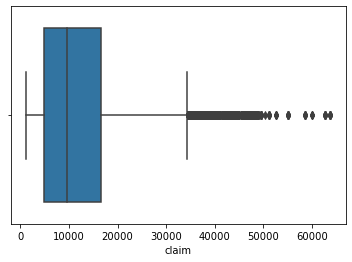

In [15]:
sns.boxplot(x='claim',data=data)

<AxesSubplot:xlabel='claim', ylabel='Count'>

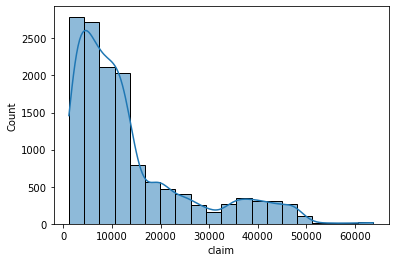

In [16]:
sns.histplot(x='claim',data=data,bins=20,kde=True)

Obsevation: claim amount is right skewed. Good news for isurance company as most claims amount is less than 20K

# Numerical features

In [17]:
num = [col for col in data.columns if data[col].dtype != 'object']
num.remove('claim')
num

['age', 'weight', 'bmi', 'bloodpressure']

# age

<AxesSubplot:xlabel='age'>

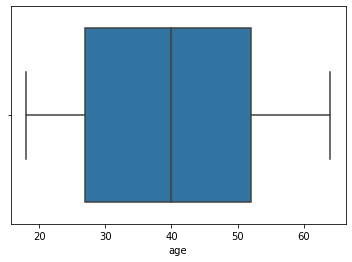

In [18]:
sns.boxplot(x='age',data=data)

<AxesSubplot:xlabel='age', ylabel='Count'>

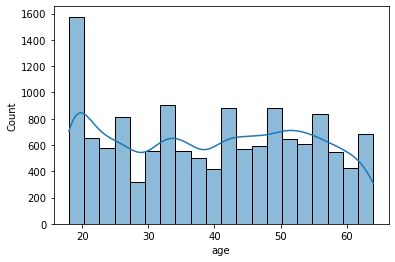

In [19]:
sns.histplot(x='age',data=data,bins=20,kde=True)

In [20]:
data['age'].describe()

count    13543.000000
mean        39.556598
std         14.011047
min         18.000000
25%         27.000000
50%         40.000000
75%         52.000000
max         64.000000
Name: age, dtype: float64

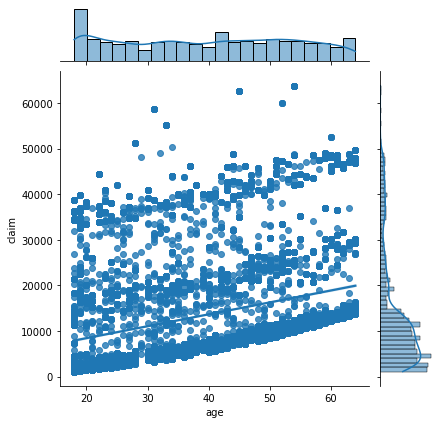

In [21]:
sns.jointplot(x="age", y="claim", data=data,kind='reg')

Observation: we can see majority of claims coming from younger generation. Also, claim amount slightly increase with age.

# weight

<AxesSubplot:xlabel='weight'>

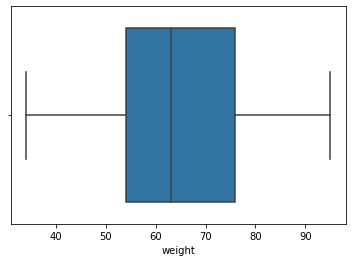

In [22]:
sns.boxplot(x='weight',data=data)

<AxesSubplot:xlabel='weight', ylabel='Count'>

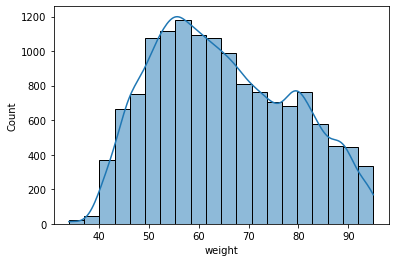

In [23]:
sns.histplot(x='weight',data=data,kde=True,bins=20)

In [24]:
data['weight'].describe()

count    13904.000000
mean        64.894347
std         13.675070
min         34.000000
25%         54.000000
50%         63.000000
75%         76.000000
max         95.000000
Name: weight, dtype: float64

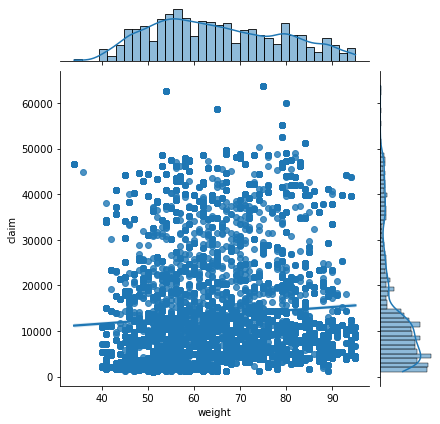

In [25]:
sns.jointplot(x='weight',y='claim',kind='reg',data=data)

Observation: 1. weight data is normally distributed.
             2. Claim amount is almost with weight.

# bmi

<AxesSubplot:xlabel='bmi'>

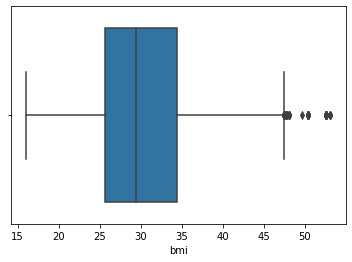

In [26]:
sns.boxplot(x='bmi',data=data)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

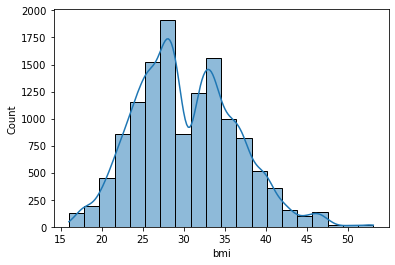

In [27]:
sns.histplot(x='bmi',data=data,kde=True,bins=20)

In [28]:
data['bmi'].describe()

count    13003.000000
mean        30.273483
std          6.125247
min         16.000000
25%         25.700000
50%         29.400000
75%         34.400000
max         53.100000
Name: bmi, dtype: float64

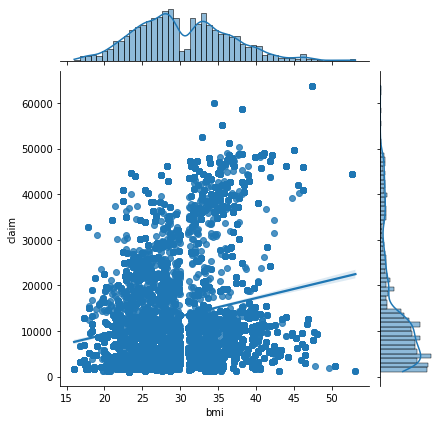

In [29]:
sns.jointplot(x='bmi',y='claim',data=data,kind='reg')

Observation: BMI data is almost normally distributed. Claim amount increases with bmi.

# bloodpressure

<AxesSubplot:xlabel='bloodpressure'>

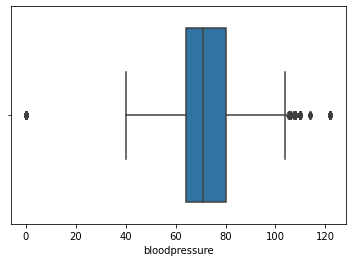

In [30]:
sns.boxplot(x='bloodpressure',data=data)

In [31]:
data['bloodpressure'].describe()

count    13904.000000
mean        68.657652
std         19.430514
min          0.000000
25%         64.000000
50%         71.000000
75%         80.000000
max        122.000000
Name: bloodpressure, dtype: float64

<AxesSubplot:xlabel='bloodpressure', ylabel='Count'>

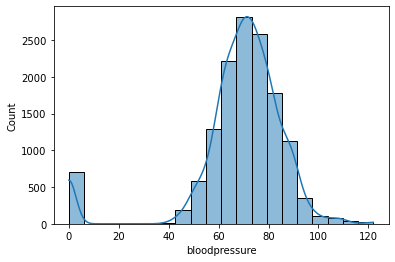

In [32]:
sns.histplot(x='bloodpressure',data=data,bins=20,kde=True)

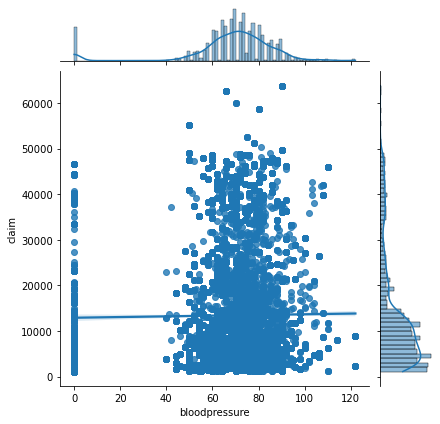

In [33]:
sns.jointplot(x='bloodpressure',y='claim',kind='reg',data=data)

Observation: ZERO BP to be imputed with mean. No relation between BP and claim.

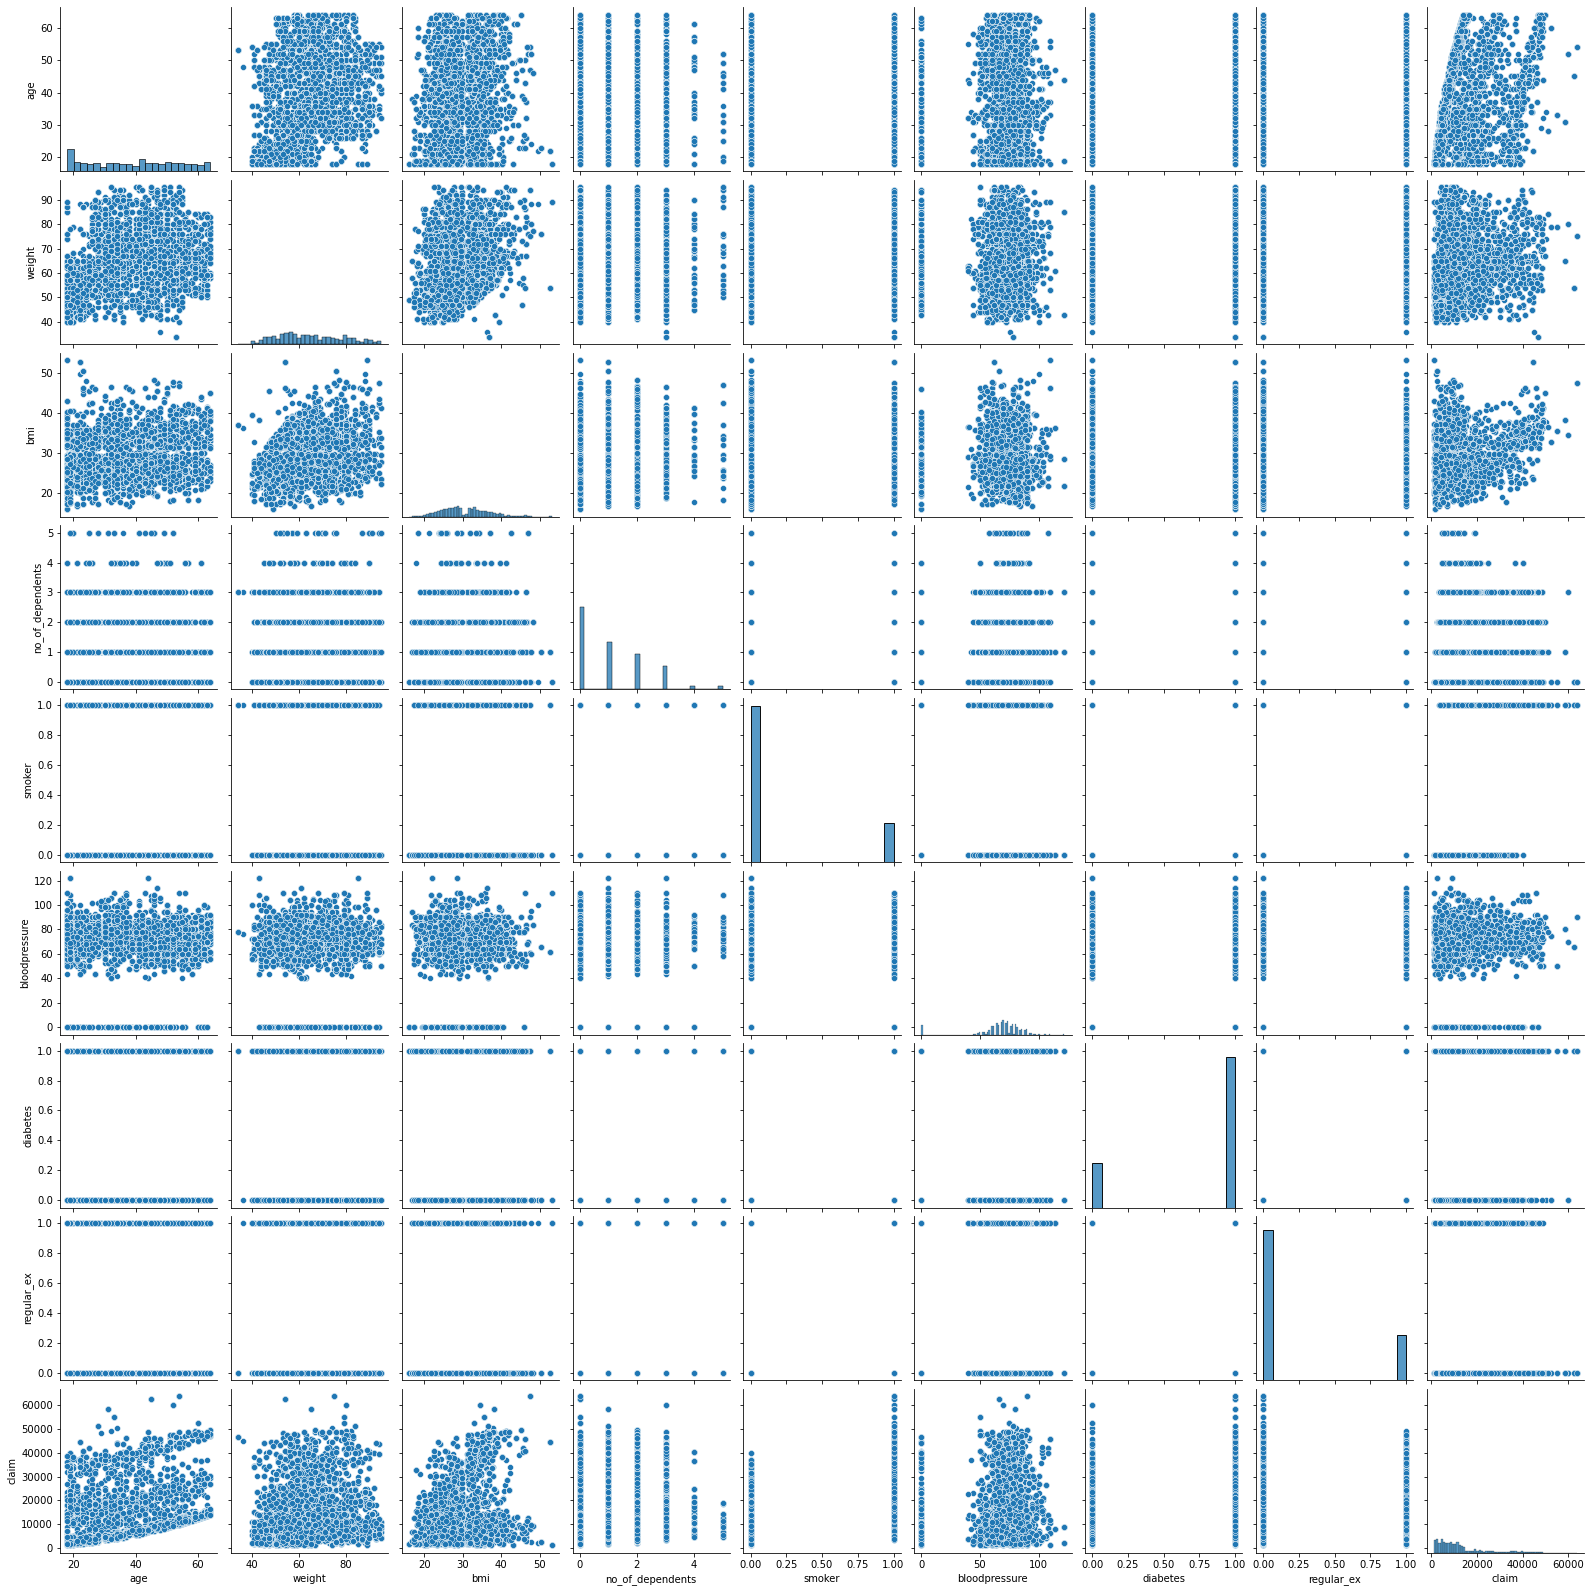

In [57]:
sns.pairplot(data=data)

In [58]:
cor = data.corr()

<AxesSubplot:>

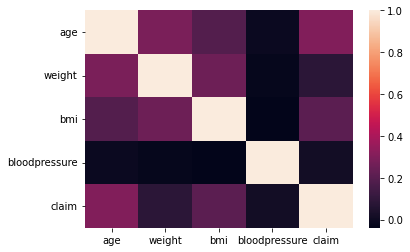

In [59]:
sns.heatmap(cor)

Obsevation: No Correlation between dependent features.

# Categorical Features

In [34]:
cat = [col for col in data.columns if data[col].dtype == 'object']

In [35]:
cat

['sex',
 'hereditary_diseases',
 'no_of_dependents',
 'smoker',
 'city',
 'diabetes',
 'regular_ex',
 'job_title']

# Sex

In [36]:
sex_count=data['sex'].value_counts()
sex_count

female    7091
male      6813
Name: sex, dtype: int64

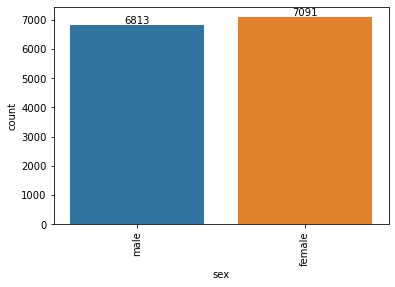

In [37]:
g=sns.countplot(data=data, x="sex",)
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

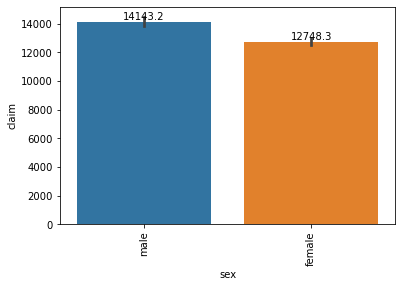

In [39]:
g=sns.barplot(data=data, x="sex", y="claim")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

Observation: No. of females claims slightly more than male but avaerage amount of claim of male is slighter greater than that of female.

# hereditary_diseases

In [41]:
hereditary_diseases_count = data['hereditary_diseases'].value_counts()
hereditary_diseases_count

NoDisease       12965
Alzheimer         137
Diabetes          136
Obesity           130
EyeDisease        112
Cancer            107
Arthritis          88
HeartDisease       87
Epilepsy           77
High BP            65
Name: hereditary_diseases, dtype: int64

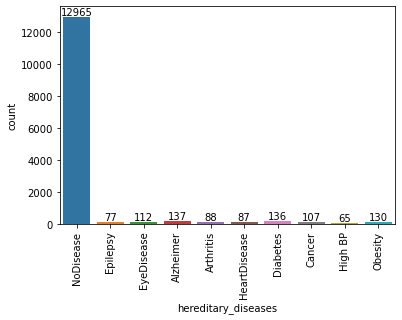

In [42]:
g=sns.countplot(data=data, x="hereditary_diseases",)
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

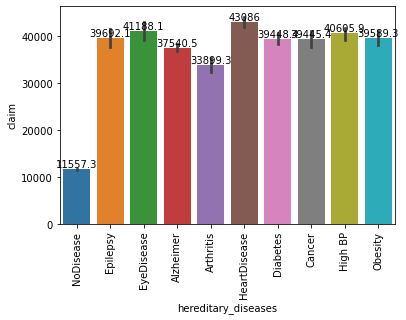

In [43]:
g=sns.barplot(data=data, x="hereditary_diseases", y="claim")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

Observation: Person with hereditary_diseases claim sigficantly more than person with no hereditary_diseases

# no_of_dependents

In [45]:
no_of_dependents_count = data['no_of_dependents'].value_counts()
no_of_dependents_count

0    5837
1    3366
2    2527
3    1678
4     272
5     224
Name: no_of_dependents, dtype: int64

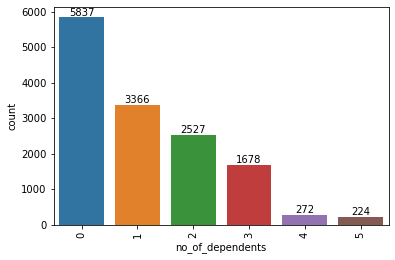

In [51]:
fig = sns.countplot(data=data,x='no_of_dependents') 
plt.xticks(rotation=90);
for container in fig.containers:
    fig.bar_label(container);

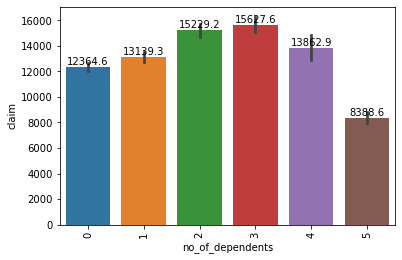

In [56]:
g=sns.barplot(data=data, x="no_of_dependents", y="claim")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

Observation: Person with no dependent claims more than person with dependent. Claim amount is sligtly greater for person with 2/3 dependent than rest.

# city

In [63]:
city_count = data['city'].value_counts()
city_count

Nashville     270
Memphis       269
NewOrleans    268
Charleston    267
Brimingham    266
             ... 
York           68
Warwick        67
Syracuse       67
Baltimore      67
Trenton        66
Name: city, Length: 91, dtype: int64

In [64]:
data['city'].unique()

array(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
       'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield',
       'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick',
       'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford',
       'Worcester', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Ox

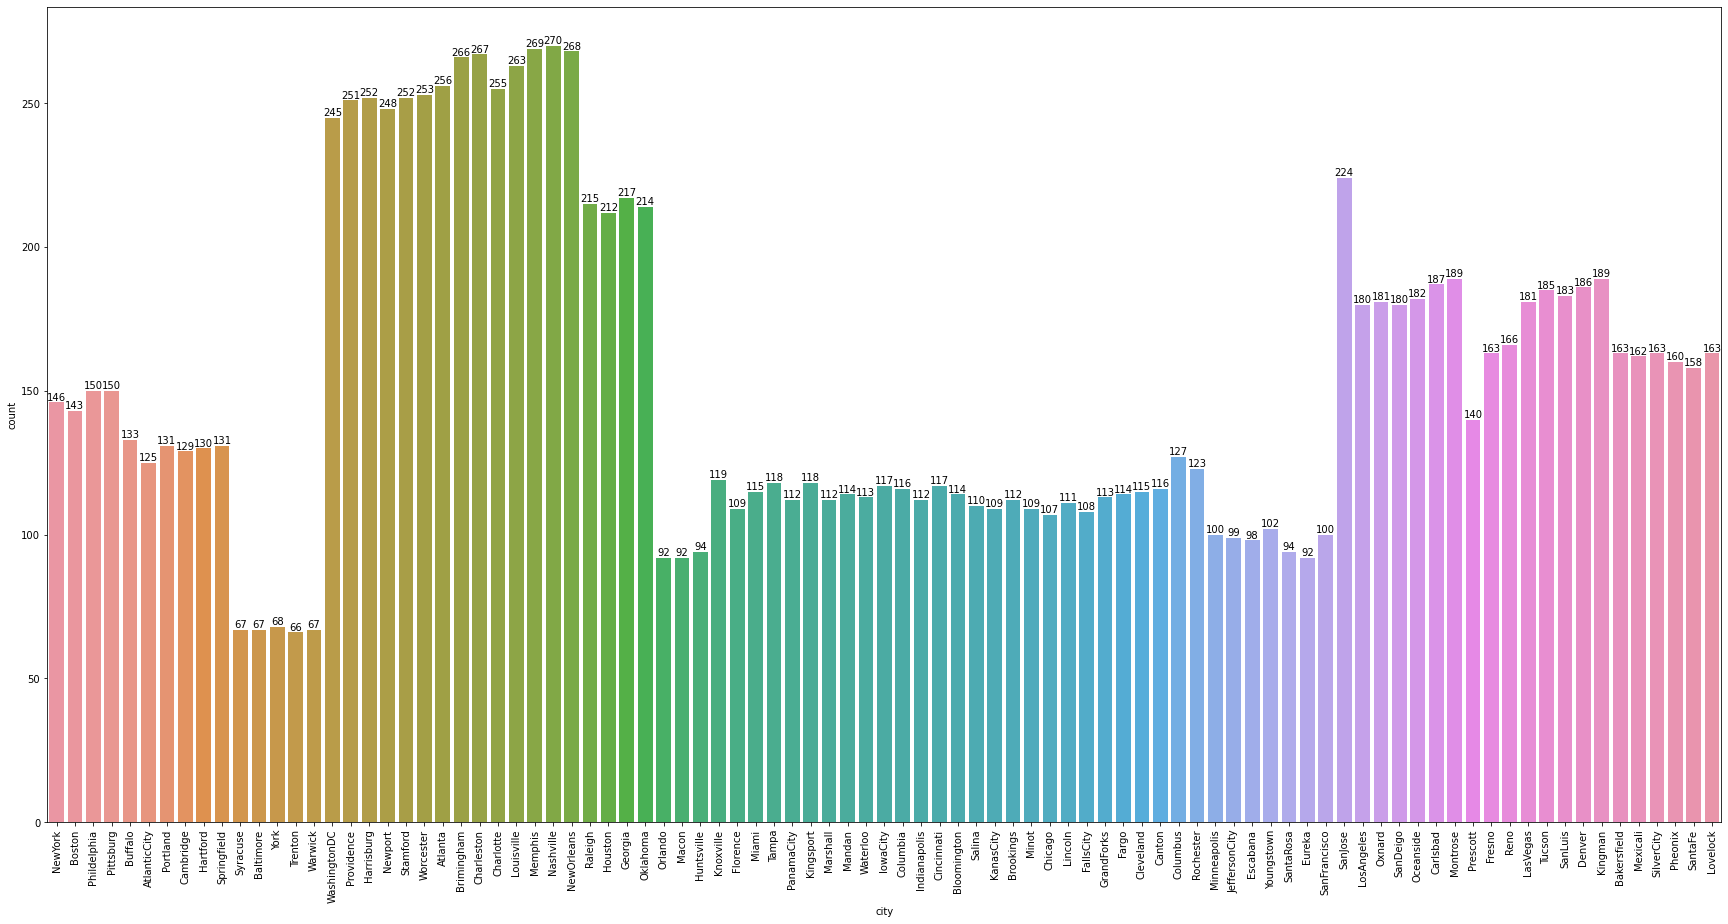

In [70]:
plt.figure(figsize=(30,15))
fig = sns.countplot(data=data,x='city') 
plt.xticks(rotation=90);
for container in fig.containers:
    fig.bar_label(container);

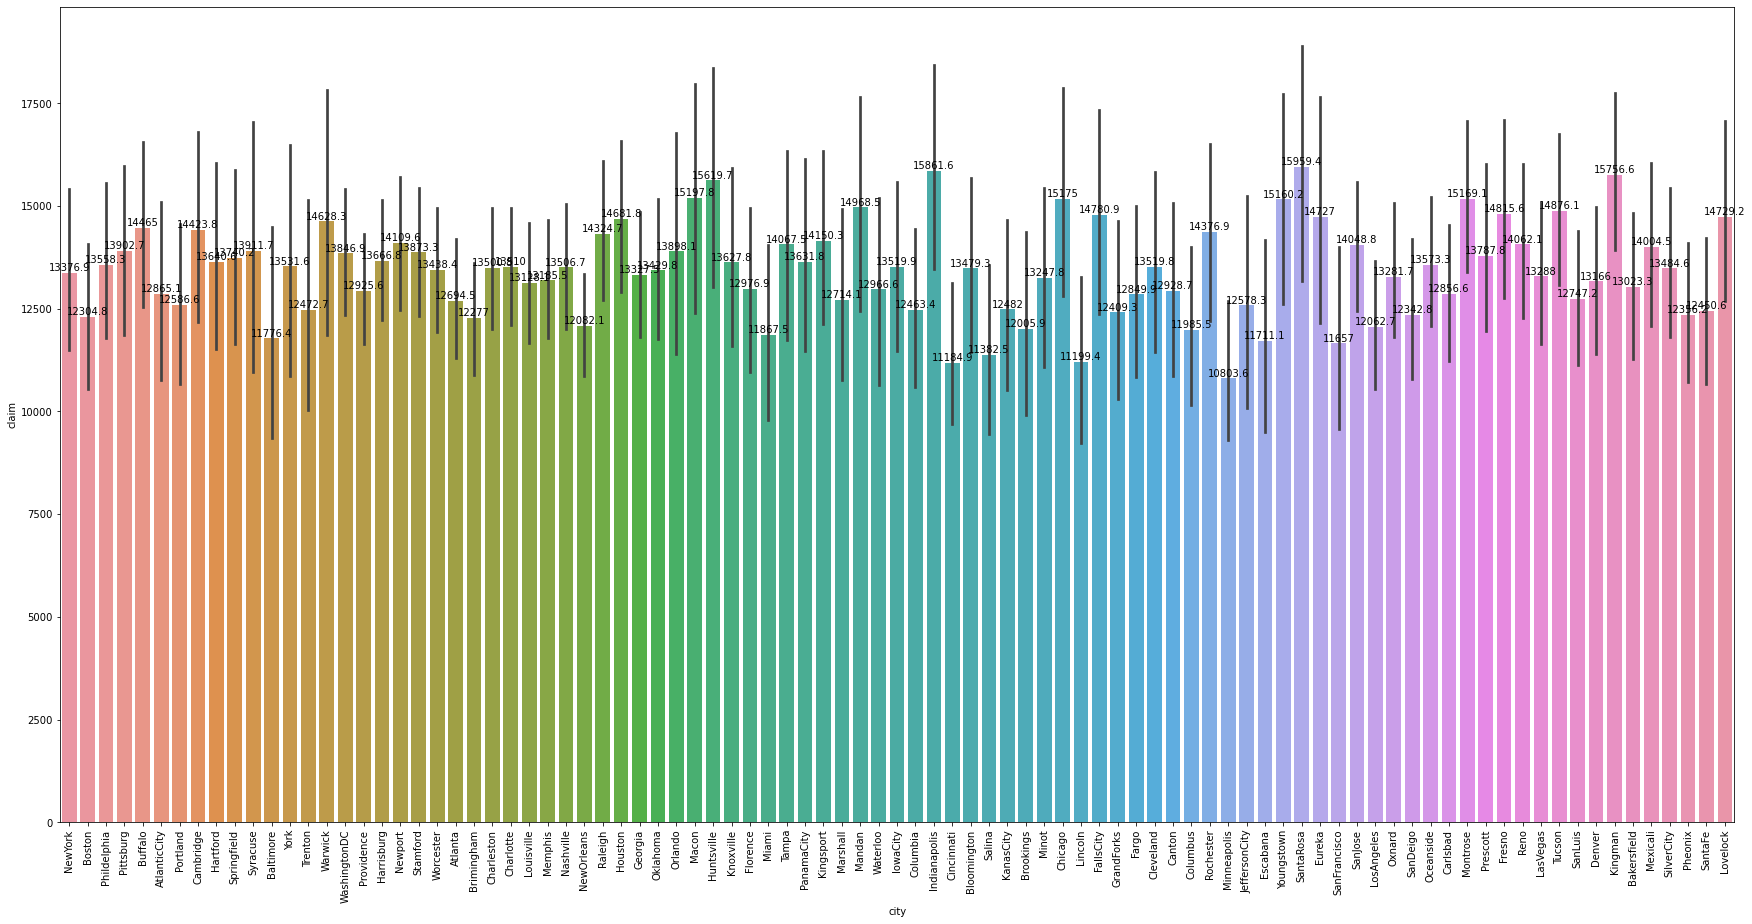

In [73]:
plt.figure(figsize=(30,15))
g=sns.barplot(data=data, x="city", y="claim")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

Obsevation: lots of value in city data. better to drop city column

# diabetes

In [81]:
diabetes_count = data['diabetes'].value_counts()
diabetes_count

1    10722
0     3182
Name: diabetes, dtype: int64

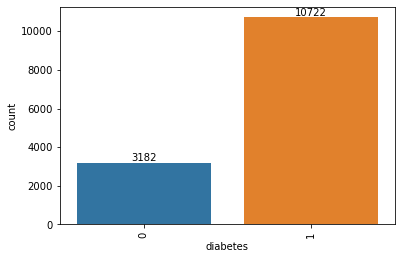

In [82]:
fig = sns.countplot(data=data,x='diabetes') 
plt.xticks(rotation=90);
for container in fig.containers:
    fig.bar_label(container);

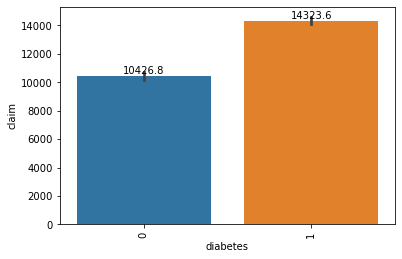

In [83]:
g=sns.barplot(data=data, x="diabetes", y="claim")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

Observation: Claim amount is more for diabetic person.

#  regular_ex

In [84]:
regular_ex_count = data['regular_ex'].value_counts()
regular_ex_count

0    10696
1     3208
Name: regular_ex, dtype: int64

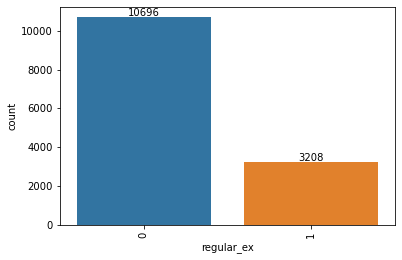

In [85]:
fig = sns.countplot(data=data,x='regular_ex') 
plt.xticks(rotation=90);
for container in fig.containers:
    fig.bar_label(container);

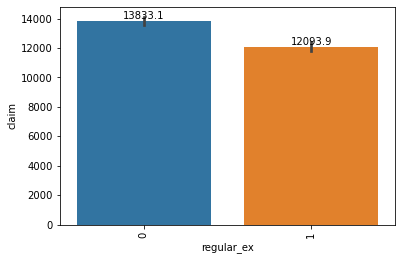

In [86]:
g=sns.barplot(data=data, x="regular_ex", y="claim")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

Observation: You should do regular Exercise to remain healthy. claim amount is more for person who does not exercise regularly.

# job_title

In [87]:
job_title_count = data['job_title'].value_counts()
job_title_count

Student              1220
HomeMakers            899
Singer                697
FilmMaker             675
Actor                 662
Dancer                645
HouseKeeper           622
Manager               565
Police                381
Photographer          370
Beautician            363
Engineer              346
FashionDesigner       346
Clerks                345
Accountant            345
CEO                   344
Architect             337
Politician            333
ITProfessional        326
DataScientist         304
Lawyer                289
Academician           287
Doctor                283
DefencePersonnels     266
Blogger               262
Chef                  257
Journalist            255
FilmDirector          255
Technician            253
CA                    250
Analyst               239
Farmer                235
GovEmployee           232
Buisnessman           224
Labourer              192
Name: job_title, dtype: int64

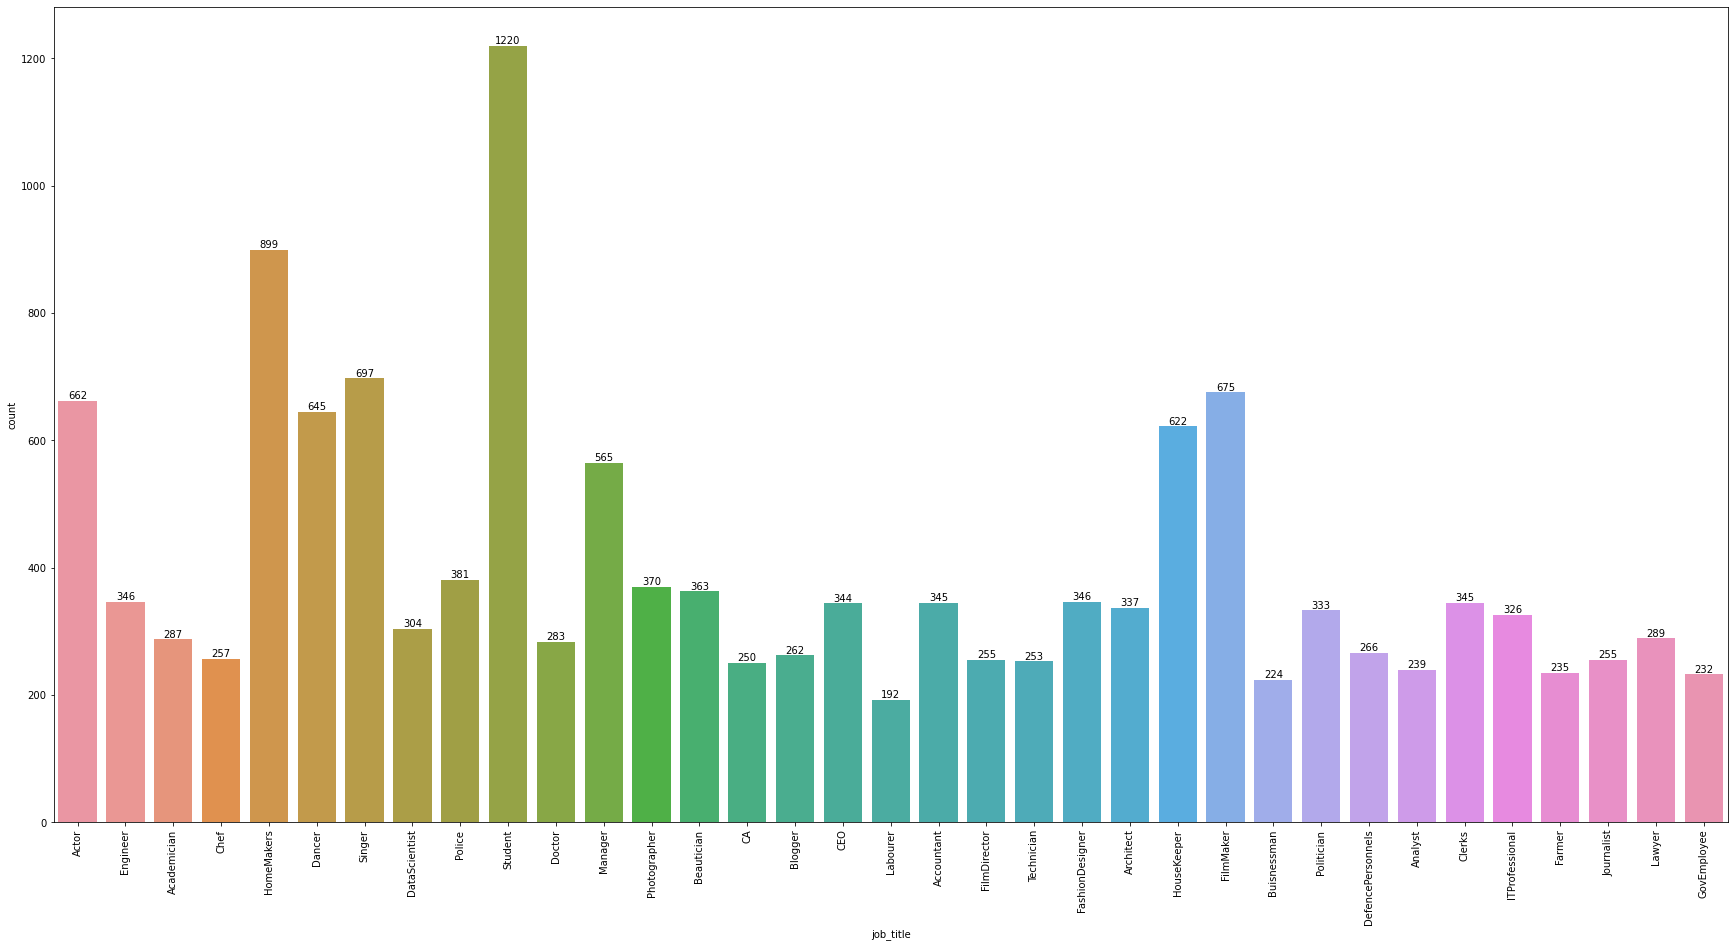

In [88]:
plt.figure(figsize=(30,15))
fig = sns.countplot(data=data,x='job_title') 
plt.xticks(rotation=90);
for container in fig.containers:
    fig.bar_label(container);

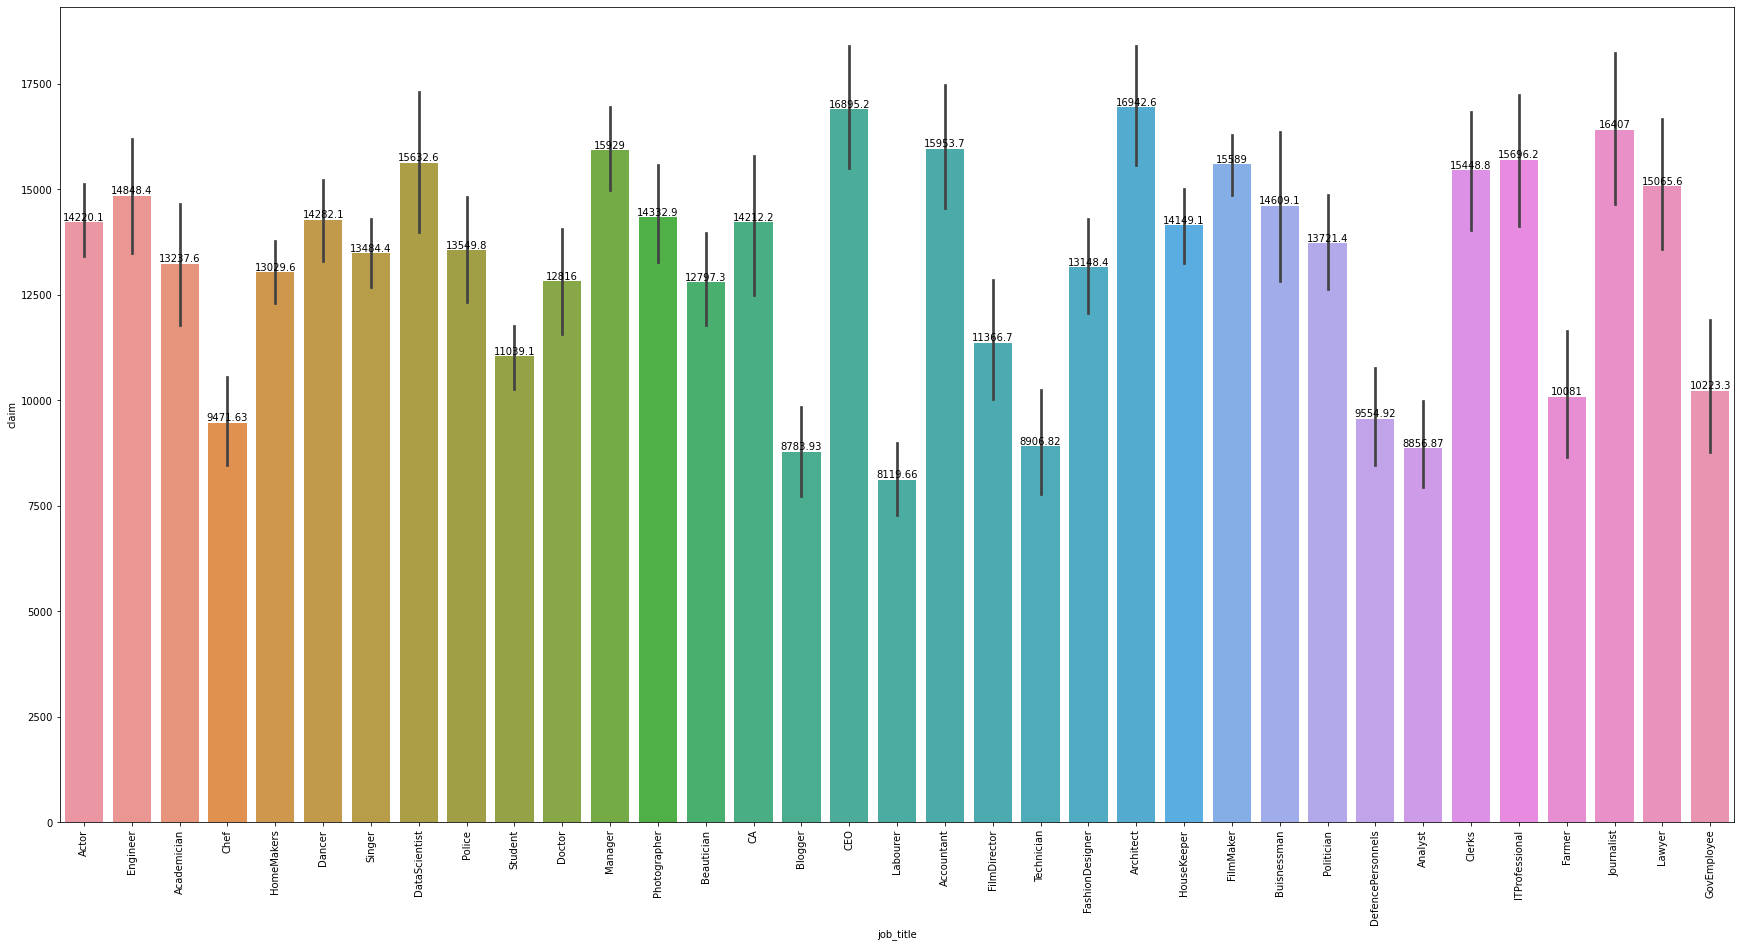

In [89]:
plt.figure(figsize=(30,15))
g=sns.barplot(data=data, x="job_title", y="claim")
plt.xticks(rotation=90);
for container in g.containers:
    g.bar_label(container);

In [99]:
print(data.head())
data.drop(data['city'], axis=1, inplace=True)

    age     sex  weight   bmi hereditary_diseases no_of_dependents smoker  \
0  60.0    male      64  24.3           NoDisease                1      0   
1  49.0  female      75  22.6           NoDisease                1      0   
2  32.0  female      64  17.8            Epilepsy                2      1   
3  61.0  female      53  36.4           NoDisease                1      1   
4  19.0  female      50  20.6           NoDisease                0      0   

   bloodpressure diabetes regular_ex    job_title    claim  
0             72        0          0        Actor  13112.6  
1             78        1          1     Engineer   9567.0  
2             88        1          1  Academician  32734.2  
3             72        1          0         Chef  48517.6  
4             82        1          0   HomeMakers   1731.7  


KeyError: 'city'

Observation: Jobs such as lobourers and farmers where physical activities invovled tends remain healthy.

In [111]:
data = data.fillna(data.mean())
data.isnull().sum()

age                                 0
weight                              0
bmi                                 0
bloodpressure                       0
claim                               0
sex_male                            0
hereditary_diseases_Arthritis       0
hereditary_diseases_Cancer          0
hereditary_diseases_Diabetes        0
hereditary_diseases_Epilepsy        0
hereditary_diseases_EyeDisease      0
hereditary_diseases_HeartDisease    0
hereditary_diseases_High BP         0
hereditary_diseases_NoDisease       0
hereditary_diseases_Obesity         0
no_of_dependents_1                  0
no_of_dependents_2                  0
no_of_dependents_3                  0
no_of_dependents_4                  0
no_of_dependents_5                  0
smoker_1                            0
diabetes_1                          0
regular_ex_1                        0
job_title_Accountant                0
job_title_Actor                     0
job_title_Analyst                   0
job_title_Ar

In [112]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,age,weight,bmi,bloodpressure,claim,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,...,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician
0,60.0,64,24.3,72,13112.6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49.0,75,22.6,78,9567.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32.0,64,17.8,88,32734.2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,61.0,53,36.4,72,48517.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19.0,50,20.6,82,1731.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
X = data.drop('claim',axis=1)
y = data['claim']

In [114]:
y

0        13112.6
1         9567.0
2        32734.2
3        48517.6
4         1731.7
          ...   
14994     6555.1
14995    21082.2
14996     7512.3
14998     9144.6
14999    25992.8
Name: claim, Length: 13904, dtype: float64

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

Text(0.5, 0, 'Relative Importance')

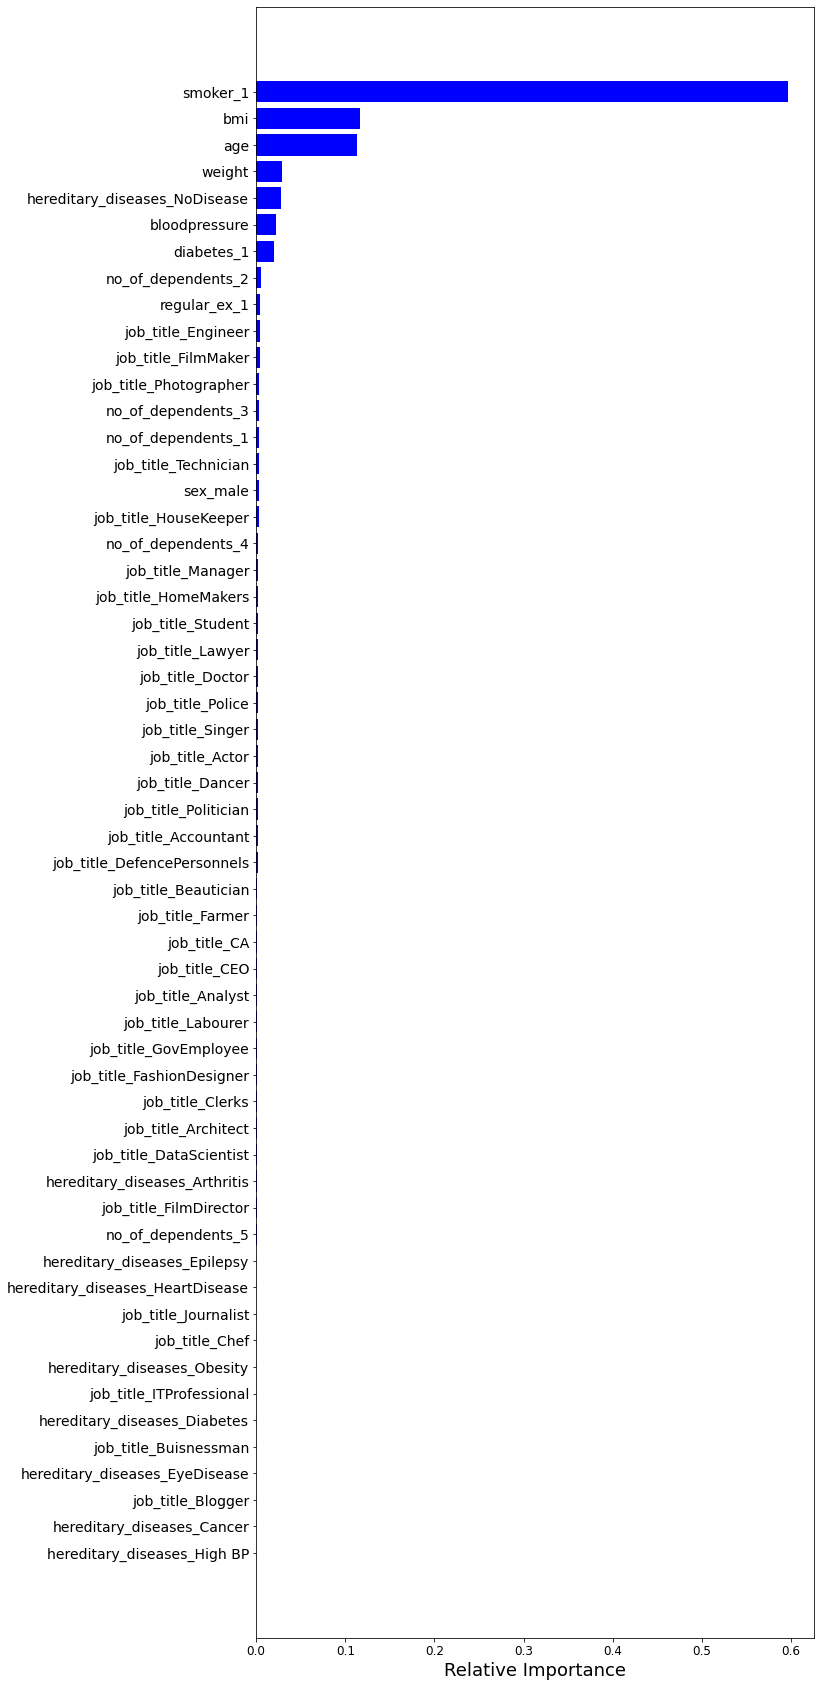

In [120]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
rf_reg.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_reg.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 30))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=14)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 18)

In [123]:
y_pred = rf_reg.predict(X_test)

In [125]:
rf_reg.score(X_test,y_test)

0.9640004405962983

In [137]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
def train_model(model):
    m = model[1]
    y_train_pred = cross_val_predict(model[1], X_train, y_train, cv=5)
    mae = mean_absolute_error(y_train,y_train_pred)
    mse = mean_squared_error(y_train,y_train_pred)
    rmse = np.sqrt(mse)
    rmsle = np.log(rmse)
    r2 = r2_score(y_train,y_train_pred)
    print(f'{model[0]} MAE: {mae}')
    print(f'{model[0]} MSE: {mse}')
    print(f'{model[0]} RMSE: {rmse}')
    print(f'{model[0]} RMSLE: {rmsle}')
    print(f'{model[0]} R2 score: {r2}')

In [142]:
from sklearn.linear_model import LinearRegression
train_model(('Linear Regression', LinearRegression()))

Linear Regression MAE: 3807.7550469042126
Linear Regression MSE: 34649867.93762538
Linear Regression RMSE: 5886.4138435575
Linear Regression RMSLE: 8.68040223613449
Linear Regression R2 score: 0.7648552033009541


In [143]:
from sklearn.linear_model import Ridge
train_model(('Ridge Regression', Ridge()))

Ridge Regression MAE: 3807.8882308735047
Ridge Regression MSE: 34647840.16750678
Ridge Regression RMSE: 5886.241599484919
Ridge Regression RMSLE: 8.680372974414663
Ridge Regression R2 score: 0.7648689643805966


In [145]:
from sklearn.neural_network import MLPRegressor
train_model(('MLPR Regression', MLPRegressor(random_state=1, max_iter=500)))

MLPR Regression MAE: 4474.765544964752
MLPR Regression MSE: 43173053.55632642
MLPR Regression RMSE: 6570.620484880132
MLPR Regression RMSLE: 8.790363549162372
MLPR Regression R2 score: 0.7070142108577651


In [147]:
from sklearn.linear_model import Lasso
train_model(('Lasso Regression', Lasso()))

Lasso Regression MAE: 3803.635806696435
Lasso Regression MSE: 34648480.129353985
Lasso Regression RMSE: 5886.295960054505
Lasso Regression RMSLE: 8.680382209563723
Lasso Regression R2 score: 0.7648646214001638


In [148]:
from sklearn.tree import DecisionTreeRegressor
train_model(('Decision Tree Regression', DecisionTreeRegressor()))

Decision Tree Regression MAE: 476.74777572270233
Decision Tree Regression MSE: 7549104.002547642
Decision Tree Regression RMSE: 2747.5632845391647
Decision Tree Regression RMSLE: 7.918469719511751
Decision Tree Regression R2 score: 0.9487694288147215


In [149]:
from sklearn.ensemble import RandomForestRegressor
train_model(('Random Forest Regression', RandomForestRegressor()))

Random Forest Regression MAE: 490.5961672160147
Random Forest Regression MSE: 5223193.756779908
Random Forest Regression RMSE: 2285.430759568075
Random Forest Regression RMSLE: 7.7343098017837075
Random Forest Regression R2 score: 0.9645537802259829


In [151]:
from sklearn.neighbors import KNeighborsRegressor
train_model(('KNN Regression', KNeighborsRegressor()))

AttributeError: 'NoneType' object has no attribute 'split'

In [152]:
from sklearn.svm import SVR
train_model(('SVM Regression', SVR()))

SVM Regression MAE: 8307.368541007103
SVM Regression MSE: 162138353.2245953
SVM Regression RMSE: 12733.355929392506
SVM Regression RMSLE: 9.451980280484603
SVM Regression R2 score: -0.10032136846084594


In [153]:
from sklearn.gaussian_process import GaussianProcessRegressor
train_model(('Gaussian Regression', GaussianProcessRegressor()))

Gaussian Regression MAE: 1172.1568817938542
Gaussian Regression MSE: 29321827.19992324
Gaussian Regression RMSE: 5414.963268566394
Gaussian Regression RMSLE: 8.59692137613718
Gaussian Regression R2 score: 0.8010129473456509


In [171]:
from xgboost import XGBRegressor
train_model(('XG Boost Regression', XGBRegressor()

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_21724/3869431718.py, line 2)

In [159]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='r2')

In [160]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [161]:
rf_reg = grid_search.best_estimator_

In [168]:
rf_reg.score(X_test,y_test)*100

97.12940096459499

In [167]:
import pickle
with open('model.pkl', 'wb') as files:
    pickle.dump(rf_reg, files)